In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

In [9]:
df = pd.read_csv("./data/data.csv")
submission=df[['id']]
df = df.drop(columns = "id")
cols = list(df.columns)
int_cols = [i for i in df.columns if df[i].dtype == int]
float_cols = [i for i in df.columns if df[i].dtype == float]
X=df[float_cols]

YH=X@np.linalg.pinv(X.T@X)
YH

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.000004,-0.000009,0.000007,0.000006,-8.477373e-06,7.444924e-06,2.318293e-05,-0.000005,3.364448e-06,0.000011,...,-4.723398e-06,-7.549798e-06,-0.000008,-6.010933e-06,4.339353e-06,-0.000002,5.553818e-06,6.729327e-06,8.326337e-06,2.684068e-06
1,-0.000007,-0.000005,0.000007,0.000010,-1.676898e-05,8.850296e-06,-8.647326e-07,0.000006,-4.030993e-06,0.000002,...,-4.283060e-06,-7.806465e-07,-0.000018,-4.190744e-06,4.068834e-06,0.000007,-8.466448e-07,-4.862033e-06,4.320714e-06,-1.132457e-05
2,0.000008,0.000003,-0.000012,-0.000007,7.178130e-07,8.016962e-06,2.022026e-05,-0.000007,4.834766e-06,0.000003,...,-4.106692e-06,-1.631312e-05,0.000012,1.689940e-05,-1.893691e-07,-0.000013,-4.795251e-06,5.017412e-06,-7.021839e-06,-1.708196e-05
3,-0.000005,0.000002,0.000003,0.000003,4.222558e-06,-1.254253e-05,1.405716e-06,-0.000004,6.582080e-06,-0.000011,...,6.454516e-06,1.320854e-05,0.000005,5.044376e-06,-9.988216e-06,0.000005,-8.444045e-06,-3.071301e-06,2.709613e-07,2.272767e-06
4,-0.000007,-0.000011,-0.000003,-0.000019,-2.974048e-06,-1.857805e-05,8.146600e-06,-0.000001,-6.224412e-06,-0.000011,...,-1.629059e-05,-4.427440e-06,0.000004,6.328706e-07,-1.148553e-05,0.000005,-4.705033e-06,9.068209e-06,-1.655051e-06,-6.675994e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.000002,0.000017,-0.000007,0.000003,-3.086940e-06,3.257721e-06,1.642515e-05,0.000004,1.037799e-05,-0.000010,...,-2.697485e-06,-2.500535e-06,-0.000010,6.126930e-06,2.423227e-06,0.000009,-4.843615e-07,-8.768176e-06,2.218945e-06,2.246335e-06
97996,0.000003,0.000007,0.000006,-0.000013,-3.673577e-06,1.945555e-06,1.821615e-06,0.000007,-1.265799e-05,0.000009,...,1.152841e-06,1.397727e-05,0.000004,7.593471e-06,-4.497716e-06,0.000002,4.743540e-06,4.659106e-07,6.311534e-06,3.583866e-06
97997,-0.000003,-0.000005,0.000019,-0.000014,2.148600e-06,-5.302599e-06,-3.881257e-06,-0.000014,5.575532e-07,0.000006,...,-8.471756e-06,-1.808108e-05,-0.000013,-9.806318e-06,7.633301e-06,0.000008,2.509488e-06,1.026935e-05,9.263657e-06,2.684845e-06
97998,0.000003,0.000022,0.000008,0.000005,4.774112e-06,6.710916e-07,-3.458751e-06,-0.000006,-4.184413e-06,-0.000008,...,-1.982304e-07,1.122735e-05,0.000016,1.887877e-06,3.554945e-06,0.000005,-2.151033e-06,-8.879635e-06,-3.448017e-06,-1.662137e-07


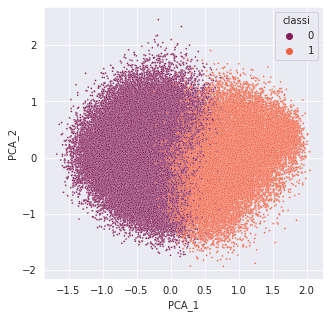

   0            1
0  2  24376.11297


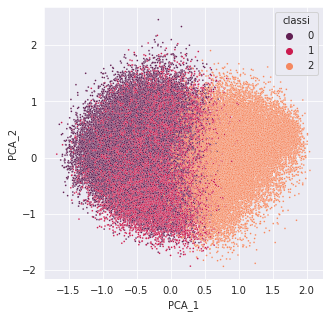

   0            1
0  2  24376.11297
1  3  22003.75581


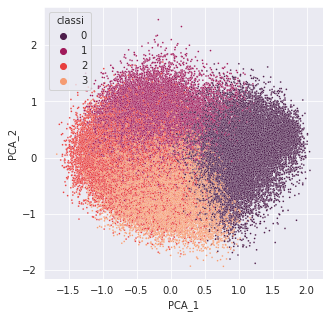

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876


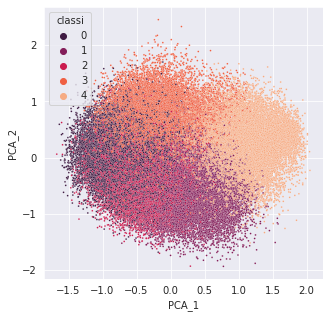

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876
3  5  18674.348965


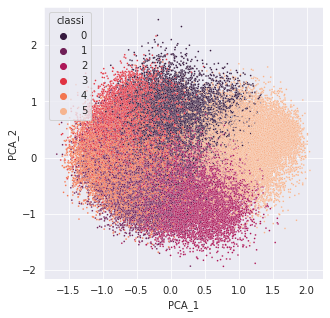

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876
3  5  18674.348965
4  6  17816.751944


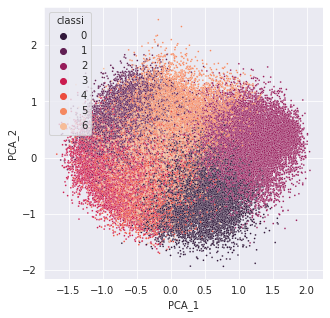

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876
3  5  18674.348965
4  6  17816.751944
5  7  17234.513101


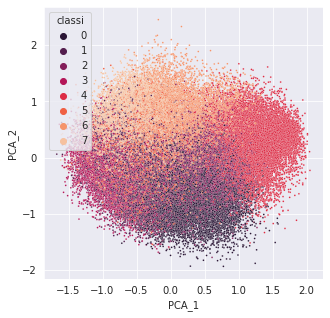

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876
3  5  18674.348965
4  6  17816.751944
5  7  17234.513101
6  8  16682.769558


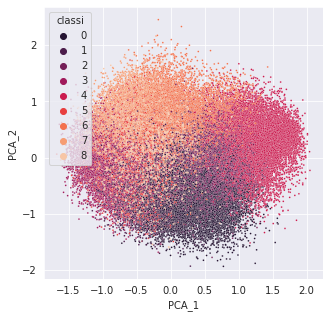

   0             1
0  2  24376.112970
1  3  22003.755810
2  4  20021.425876
3  5  18674.348965
4  6  17816.751944
5  7  17234.513101
6  8  16682.769558
7  9  16249.538975


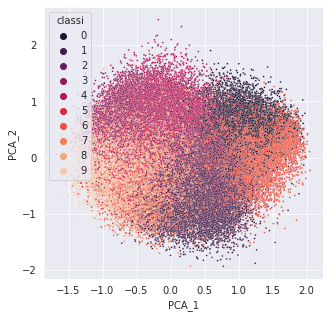

    0             1
0   2  24376.112970
1   3  22003.755810
2   4  20021.425876
3   5  18674.348965
4   6  17816.751944
5   7  17234.513101
6   8  16682.769558
7   9  16249.538975
8  10  15887.791853


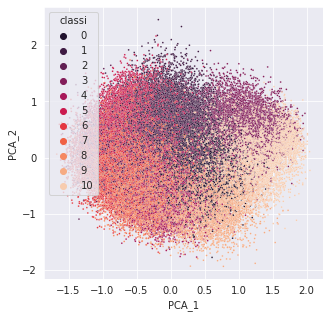

    0             1
0   2  24376.112970
1   3  22003.755810
2   4  20021.425876
3   5  18674.348965
4   6  17816.751944
5   7  17234.513101
6   8  16682.769558
7   9  16249.538975
8  10  15887.791853
9  11  15544.754079


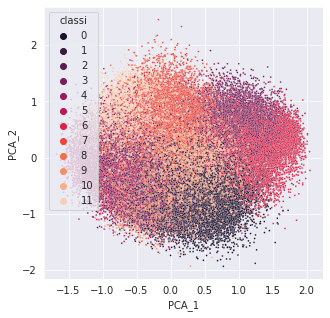

     0             1
0    2  24376.112970
1    3  22003.755810
2    4  20021.425876
3    5  18674.348965
4    6  17816.751944
5    7  17234.513101
6    8  16682.769558
7    9  16249.538975
8   10  15887.791853
9   11  15544.754079
10  12  15230.587461


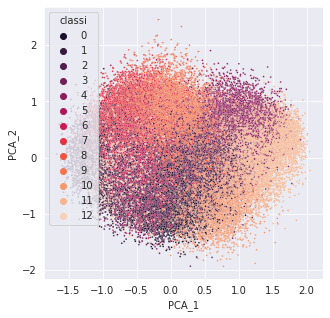

     0             1
0    2  24376.112970
1    3  22003.755810
2    4  20021.425876
3    5  18674.348965
4    6  17816.751944
5    7  17234.513101
6    8  16682.769558
7    9  16249.538975
8   10  15887.791853
9   11  15544.754079
10  12  15230.587461
11  13  14955.829810


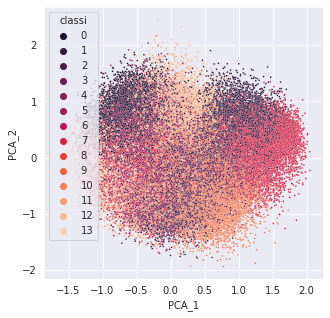

     0             1
0    2  24376.112970
1    3  22003.755810
2    4  20021.425876
3    5  18674.348965
4    6  17816.751944
5    7  17234.513101
6    8  16682.769558
7    9  16249.538975
8   10  15887.791853
9   11  15544.754079
10  12  15230.587461
11  13  14955.829810
12  14  14707.354726


In [21]:

from sklearn import preprocessing
from sklearn import metrics
X_scaled = preprocessing.RobustScaler().fit(df).transform(df)
#X_scaled = PowerTransformer().fit(X_scaled).transform(X_scaled)
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans,MeanShift,SpectralClustering
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.decomposition import PCA,TruncatedSVD,NMF,FastICA,FactorAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
# scores=[]
inertia = []
for nb_clus in range(2,15):
    X_scaled= preprocessing.Normalizer().fit_transform(df)
    # X_scaled=preprocessing.PowerTransformer().fit_transform(X_scaled)

    # X_scaled = pd.DataFrame(X_scaled)
    X_pca = FactorAnalysis().fit_transform(X_scaled)
    PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})
                
    k = KMeans(n_clusters=nb_clus, random_state=0)
    preds = k.fit_predict(X_scaled)
    PCA_df['classi']=preds
    f,ax = plt.subplots(figsize=(5, 5))
    sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", hue="classi", s=3, palette=sns.color_palette("rocket", PCA_df["classi"].nunique()));
    plt.show()
    # shs=metrics.silhouette_score(X_scaled, preds, metric='euclidean')
    # chs=metrics.calinski_harabasz_score(X_scaled, preds)
    # dbs=metrics.davies_bouldin_score(X_scaled, preds)
    # scores.append([nb_clus,shs,chs,dbs])
    # print(pd.DataFrame(scores))
    inertia.append([nb_clus,k.inertia_])
    print(pd.DataFrame(inertia))



In [22]:
inertia = pd.DataFrame(inertia, columns=['nb_clusters', 'inertia'])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


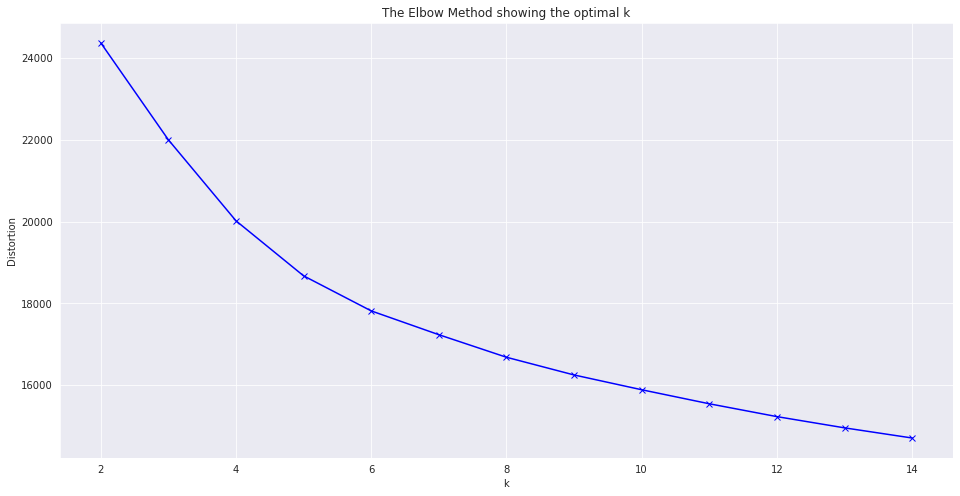

In [23]:
plt.figure(figsize=(16,8))
plt.plot(range(2,15), inertia['inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
# pd.DataFrame(scores, columns=['nb_clusters', 'silhouette_score','calinski_harabasz_score','davies_bouldin_score']).to_csv('scores3clus.csv')
pd.DataFrame(inertia, columns=['nb_clusters', 'inertia']).to_csv('inertia.csv')